In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from core.data.utils import read_all_datasets, read_all_metadata
from core.data.processing.normalization import robust_zscore_normalization_per_dataset

In [2]:
DATA_DIR = '../../db'

dataset, dataset_label = read_all_datasets(DATA_DIR, dropna=False)
metadata = read_all_metadata(DATA_DIR)

In [3]:
y = metadata[metadata.disease.isin(['Ctrl', 'UC']) & metadata.time_of_biopsy.isin([None, 'W0', 'Before'])].disease
dataset_labels = dataset_label.loc[y.index]
X = dataset.loc[y.index]

X.shape, y.shape

((934, 30007), (934,))

In [4]:
X_norm = robust_zscore_normalization_per_dataset(X, dataset_label)

/usr/local/anaconda3/envs/ibd/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/anaconda3/envs/ibd/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/usr/local/anaconda3/envs/ibd/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/anaconda3/envs/ibd/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/usr/local/anaconda3/envs/ibd/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:1550: RuntimeWarning: All-NaN slice encountered
  self.center_ = np.nanmedian(X, axis=0)
/usr/local/anaconda3/envs/ibd/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountere

In [5]:
from core.utils.genes import entrez_id_to_gene_symbol

X_norm = entrez_id_to_gene_symbol(X_norm)

4974 input query terms found no hit:	['100127886', '100127940', '100127972', '100127974', '100128046', '100128175', '100128185', '1001281


In [ ]:
from core.stats.tests import test_two_groups


test_data = X_norm.astype(float)
test_data['disease'] = y

test_results = test_two_groups(test_data, 'disease', alpha=0.05/test_data.shape[1])

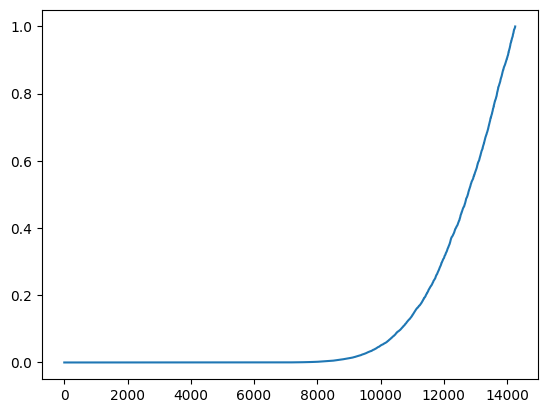

In [ ]:
import matplotlib.pyplot as plt

plt.plot([p for f, (p, d, t) in test_results]);

In [ ]:
genes = [f for f, (p, d, t) in test_results]

In [ ]:
import gseapy as gp

# Get the list of available libraries
# libraries = gp.get_library_name(organism='Human')
# print(libraries)

# Define your gene list
gene_list = genes[:500]  # use your gene list variable

# Define parameters for Enrichr
enrichr_libraries = ['WikiPathway_2023_Human']

# Perform Enrichment Analysis
enrichr_results = gp.enrichr(gene_list=gene_list, gene_sets=enrichr_libraries, organism='Human', outdir='../../results/enrichr_kegg', cutoff=0.05)

/usr/local/anaconda3/envs/ibd/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


In [ ]:
enrichr_results.res2d[enrichr_results.res2d['Adjusted P-value'] < 0.05].sort_values('Combined Score', ascending=False).head(20)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
23,WikiPathway_2023_Human,Arachidonic Acid AA ARA Oxylipin Metabolism WP...,3/4,6.097384e-05,1.316019e-03,0,0,117.700201,1142.288171,EPHX2;TBXAS1;PTGS2
0,WikiPathway_2023_Human,Mitochondrial Fatty Acid Oxidation Disorders W...,9/19,2.625820e-10,1.360175e-07,0,0,35.725051,788.110979,HADHA;CPT1A;SLC22A5;CPT2;ECI1;ACADM;SLC25A20;H...
1,WikiPathway_2023_Human,Mitochondrial Long Chain Fatty Acid Beta Oxida...,8/17,2.877527e-09,6.199696e-07,0,0,35.214092,692.532115,HADHA;CPT1A;CPT2;ECI1;ACADM;SLC25A20;HADH;ACSF2
3,WikiPathway_2023_Human,miRNA Targets In ECM And Membrane Receptors WP...,8/22,3.389924e-08,4.389951e-06,0,0,22.631823,389.264497,COL3A1;COL1A2;COL4A1;LAMA4;COL6A1;COL5A2;COL6A...
2,WikiPathway_2023_Human,Burn Wound Healing WP5055,14/74,3.590558e-09,6.199696e-07,0,0,9.333333,181.486278,CXCL8;MMP1;TNC;CXCL1;INHBA;ICAM1;COL1A1;COL1A2...
22,WikiPathway_2023_Human,Platelet Mediated Interactions With Vascular A...,5/17,4.617826e-05,1.040015e-03,0,0,16.404040,163.761560,SELP;CD40;IL1B;ICAM1;PF4
8,WikiPathway_2023_Human,Fatty Acid Beta Oxidation WP143,8/34,1.478045e-06,8.506973e-05,0,0,12.178862,163.498662,HADHA;CPT1A;CPT2;ECI1;ACSL5;ACADM;SLC25A20;HADH
10,WikiPathway_2023_Human,Photodynamic Therapy Induced NF kB Survival Si...,8/35,1.874348e-06,8.826475e-05,0,0,11.727191,154.649390,CXCL8;BCL2A1;MMP1;IL1B;MMP3;PTGS2;CXCL2;ICAM1
14,WikiPathway_2023_Human,Matrix Metalloproteinases WP129,7/30,7.232791e-06,2.497724e-04,0,0,12.023900,142.325527,MMP12;MMP7;MMP1;MMP3;MMP19;TIMP1;MMP10
62,WikiPathway_2023_Human,Catalytic Cycle Of Mammalian Flavin Containing...,2/5,5.932812e-03,4.815874e-02,0,0,26.100402,133.823468,FMO4;FMO5
